### Step-histograms to investigate threshold properties:

- __CME Speed__ 
    - SMART Total Area
    - SMART R-value
    
    
- __GOES Peak Flare Flux__ 
    - SMART Total Area
    - SMART Total Flux
    - SMART Total Area
    - SMART WL$_{\text{SG}}$

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [2]:
# Defining the path for the dataframe
custom_df = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'

# Importing the dataframe
df = pd.read_pickle(custom_df)

In [3]:
# Want data for flare GOES class and SRS area
dfsm = df[['goes_flux', 'smart_total_area']]

# Removing the rows containing any NaN values
dfsm = dfsm.dropna(how='any')

# Reindexing
dfsm = dfsm.reset_index(drop=True)

# Splitting up the different GOES classes for this new dataframe
dfsm.goes_flux = np.log10(dfsm.goes_flux)

a2 = dfsm[ (dfsm['goes_flux'] >= -8.0) & (dfsm['goes_flux'] <= -7.0) ]  
b2 = dfsm[ (dfsm['goes_flux'] > -7.0)  & (dfsm['goes_flux'] <= -6.0) ]  
c2 = dfsm[ (dfsm['goes_flux'] > -6.0)  & (dfsm['goes_flux'] <= -5.0) ]  
m2 = dfsm[ (dfsm['goes_flux'] > -5.0)  & (dfsm['goes_flux'] <= -4.0) ]  
x2 = dfsm[ (dfsm['goes_flux'] > -4.0)  & (dfsm['goes_flux'] <= -3.0) ]  

# Converting from m.s.h to cm^2 (1 m.s.h = 3.0E16 cm^2)
#a2cm = a2.smart_total_area.values*3.0E16
#b2cm = b2.smart_total_area.values*3.0E16
#c2cm = c2.smart_total_area.values*3.0E16
#m2cm = m2.smart_total_area.values*3.0E16
#x2cm = x2.smart_total_area.values*3.0E16

#==================================================================================================================

# Want data for flare GOES class and SRS area
dfc = df[['cme_halo', 'smart_total_area']]

# Removing the rows containing any NaN values
dfc = dfc.dropna(how='any')

# Reindexing
dfc = dfc.reset_index(drop=True)

# Converting from m.s.h to cm^2 (1 m.s.h = 3.0E16 cm^2)
#dfc.smart_total_area = dfc.smart_total_area.values*3.0E16

# Splitting up the Halo flags
one   = dfc[ (dfc['cme_halo'] == 1.0) ] 
two   = dfc[ (dfc['cme_halo'] == 2.0) ] 
three = dfc[ (dfc['cme_halo'] == 3.0) ] 
four  = dfc[ (dfc['cme_halo'] == 4.0) ] 

#==================================================================================================================

dfsp = df[['cme_speed', 'smart_total_area', 'smart_r_value', 'smart_total_flux']]

# Removing the rows containing any NaN values
dfsp = dfsp.dropna(how='any')

# Reindexing
dfsp = dfsp.reset_index(drop=True)

# Converting from m.s.m to cm^2 (1 m.s.h = 3.0E16 cm^2)
#dfsp.smart_total_area = dfsp.smart_total_area.values*3.0E16

# Splitting up the CME speeds
s1 = dfsp[ (dfsp.cme_speed > 0)    & (dfsp.cme_speed <= 1000) ]  
s2 = dfsp[ (dfsp.cme_speed > 1000) & (dfsp.cme_speed <= 2000) ]  
s3 = dfsp[ (dfsp.cme_speed > 2000) & (dfsp.cme_speed <= 3000) ]  
s4 = dfsp[ (dfsp.cme_speed > 3000) ]

# total flux is an object ---> should probably change this in original database!
dfsp.smart_total_flux = dfsp.smart_total_flux.astype(float)

# Splitting up the total flux
f1 = dfsp[ (dfsp.smart_total_flux > 1.0E20) & (dfsp.smart_total_flux <= 1.0E21) ]  
f2 = dfsp[ (dfsp.smart_total_flux > 1.0E21) & (dfsp.smart_total_flux <= 1.0E22) ]  
f3 = dfsp[ (dfsp.smart_total_flux > 1.0E22) & (dfsp.smart_total_flux <= 1.0E23) ]  
f4 = dfsp[ (dfsp.smart_total_flux > 1.0E23) ]

#==================================================================================================================

dfq = df[['goes_flux', 'smart_r_value']]

# Removing the rows containing any NaN values
dfq = dfq.dropna(how='any')

# Reindexing
dfq = dfq.reset_index(drop=True)

# Splitting up the different GOES classes for this dataframe
dfq.goes_flux = np.log10(dfq.goes_flux)

aq = dfq[ (dfq['goes_flux'] >= -8.0) & (dfq['goes_flux'] <= -7.0) ]  
bq = dfq[ (dfq['goes_flux'] > -7.0)  & (dfq['goes_flux'] <= -6.0) ]  
cq = dfq[ (dfq['goes_flux'] > -6.0)  & (dfq['goes_flux'] <= -5.0) ]  
mq = dfq[ (dfq['goes_flux'] > -5.0)  & (dfq['goes_flux'] <= -4.0) ]  
xq = dfq[ (dfq['goes_flux'] > -4.0)  & (dfq['goes_flux'] <= -3.0) ]  

#==================================================================================================================

df2 = df[['goes_flux', 'smart_total_flux']]
df2 = df2.dropna(how='any')
df2 = df2.reset_index(drop=True)

# total flux is an object ---> should probably change this in original database!
df2.smart_total_flux = df2.smart_total_flux.astype(float)

# Splitting up the different GOES classes for this dataframe
df2.goes_flux = np.log10(df2.goes_flux)

af = df2[ (df2['goes_flux'] >= -8.0) & (df2['goes_flux'] <= -7.0) ]  
bf = df2[ (df2['goes_flux'] > -7.0) & (df2['goes_flux'] <= -6.0) ]  
cf = df2[ (df2['goes_flux'] > -6.0) & (df2['goes_flux'] <= -5.0) ]  
mf = df2[ (df2['goes_flux'] > -5.0) & (df2['goes_flux'] <= -4.0) ]  
xf = df2[ (df2['goes_flux'] > -4.0) & (df2['goes_flux'] <= -3.0) ]  

#==================================================================================================================

# WLSG
dfw = df[['goes_flux', 'smart_wlsg']]
dfw = dfw.dropna(how='any')
dfw = dfw[(dfw[['smart_wlsg']] != 0).all(axis=1)]
dfw = dfw.reset_index(drop=True)

# Splitting up the different GOES classes for this dataframe
dfw.goes_flux = np.log10(dfw.goes_flux)

aw = dfw[ (dfw['goes_flux'] >= -8.0) & (dfw['goes_flux'] <= -7.0) ]  
bw = dfw[ (dfw['goes_flux'] > -7.0) & (dfw['goes_flux'] <= -6.0) ]  
cw = dfw[ (dfw['goes_flux'] > -6.0) & (dfw['goes_flux'] <= -5.0) ]  
mw = dfw[ (dfw['goes_flux'] > -5.0) & (dfw['goes_flux'] <= -4.0) ]  
xw = dfw[ (dfw['goes_flux'] > -4.0) & (dfw['goes_flux'] <= -3.0) ]  

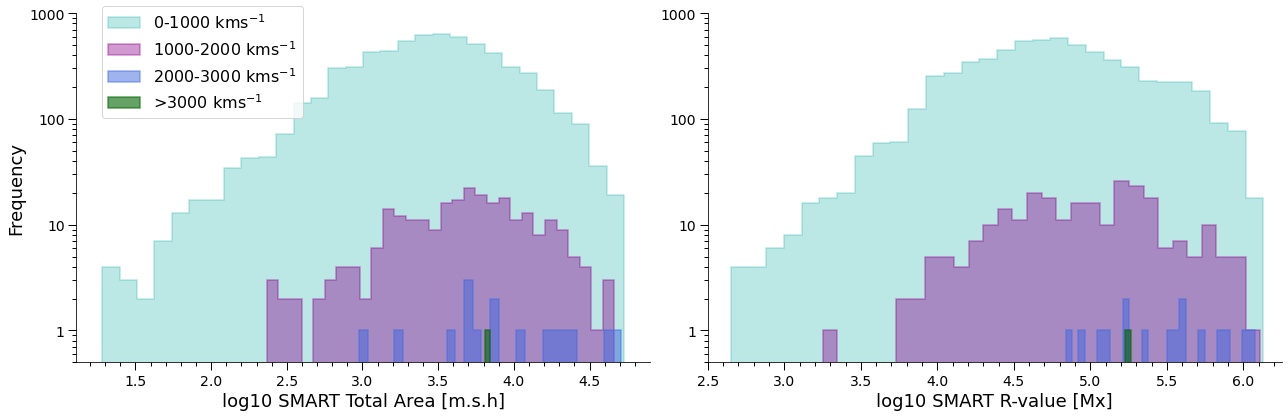

In [7]:
# Plotting CME step-hists
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey='row', facecolor='white')
fig1.subplots_adjust(wspace=0.15)

# Sunspot area with relation to CME speed 
na, ba, pa = ax1.hist(np.log10(s1.smart_total_area), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label='0-1000 kms$^{-1}$')
nb, bb, pb = ax1.hist(np.log10(s2.smart_total_area), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label='1000-2000 kms$^{-1}$')
nc, bc, pc = ax1.hist(np.log10(s3.smart_total_area), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='2000-3000 kms$^{-1}$')
nm, bm, pm = ax1.hist(np.log10(s4.smart_total_area), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label='>3000 kms$^{-1}$')

ax1.set_yscale('log')
ax1.set_ylim([0.5,1000])
ax1.set_yticks([1, 10, 100, 1000])
ax1.set_yticklabels(['1', '10', '100', '1000'])

ax1.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=18)
ax1.set_ylabel('Frequency', fontsize=18)
ax1.legend(loc=[0.045,0.70], fontsize=16)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax1.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


# R-value with relation to CME speed
na, ba, pa = ax2.hist(np.log10(s1.smart_r_value), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label='0-1000 kms$^{-1}$')
nb, bb, pb = ax2.hist(np.log10(s2.smart_r_value), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label='1000-2000 kms$^{-1}$')
nc, bc, pc = ax2.hist(np.log10(s3.smart_r_value), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='2000-3000 kms$^{-1}$')
nm, bm, pm = ax2.hist(np.log10(s4.smart_r_value), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label='>3000 kms$^{-1}$')

ax2.set_yscale('log')
ax2.set_xlim([2.5,6.25])
ax2.set_ylim([0.5,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('log10 SMART R-value [Mx]', fontsize=18)
#ax2.legend(loc=[0.05,0.70], fontsize=16)

ax2.yaxis.set_tick_params(labelleft=True)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax2.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('speed_step.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

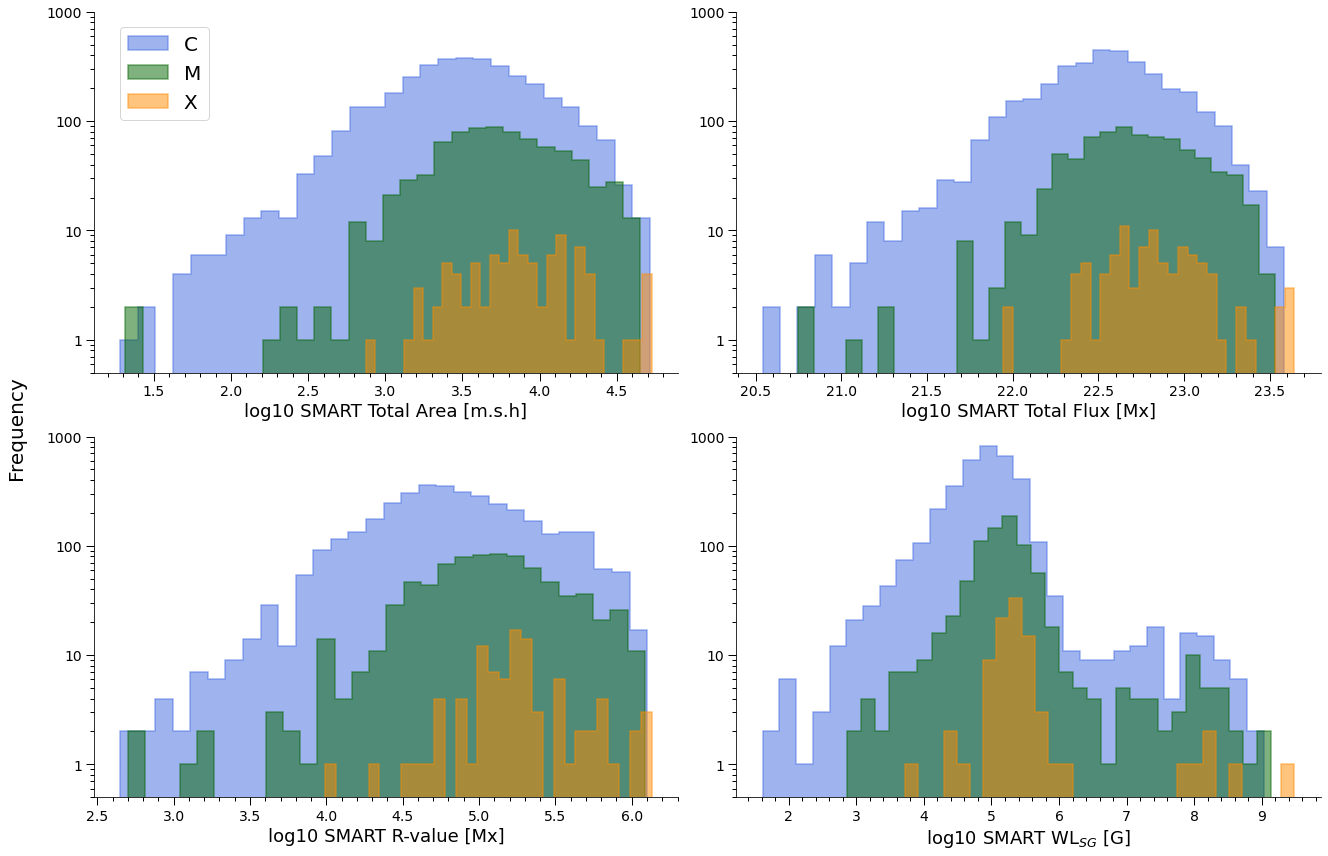

In [6]:
# Plotting flare step-hists
fig2, ((ax3, ax4), (ax5, ax6)) = plt.subplots(2, 2, figsize=(18, 12), sharey='row', facecolor='white')

# Area
nc, bc, pc = ax3.hist(np.log10(c2.smart_total_area), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax3.hist(np.log10(m2.smart_total_area), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax3.hist(np.log10(x2.smart_total_area), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax3.set_yscale('log')
ax3.set_ylim([0.5,1000])
ax3.set_yticks([1, 10, 100, 1000])
ax3.set_yticklabels(['1', '10', '100', '1000'])

ax3.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=18)
ax3.legend(loc=[0.045,0.70], fontsize=20)

plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)

ax3.xaxis.set_minor_locator(MultipleLocator(0.1))
ax3.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax3.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)


# Total flux
nc, bc, pc = ax4.hist(np.log10(cf.smart_total_flux), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax4.hist(np.log10(mf.smart_total_flux), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax4.hist(np.log10(xf.smart_total_flux), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax4.set_yscale('log')
ax4.set_ylim([0.5,1000])
ax4.set_yticks([1, 10, 100, 1000])
ax4.set_yticklabels(['1', '10', '100', '1000'])

ax4.set_xlabel('log10 SMART Total Flux [Mx]', fontsize=18)
#ax4.legend(loc=[0.045,0.75], fontsize=18)

ax4.yaxis.set_tick_params(labelleft=True)
plt.setp(ax4.get_xticklabels(), fontsize=14)
plt.setp(ax4.get_yticklabels(), fontsize=14)

ax4.xaxis.set_minor_locator(MultipleLocator(0.1))
ax4.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax4.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)


# R-values
nc, bc, pc = ax5.hist(np.log10(cq.smart_r_value), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax5.hist(np.log10(mq.smart_r_value), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax5.hist(np.log10(xq.smart_r_value), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax5.set_yscale('log')
ax5.set_ylim([0.5,1000])
ax5.set_yticks([1, 10, 100, 1000])
ax5.set_yticklabels(['1', '10', '100', '1000'])

ax5.set_xlabel('log10 SMART R-value [Mx]', fontsize=18)
#ax5.legend(loc=[0.045,0.75], fontsize=18)

ax5.yaxis.set_tick_params(labelleft=True)
plt.setp(ax5.get_xticklabels(), fontsize=14)
plt.setp(ax5.get_yticklabels(), fontsize=14)

ax5.xaxis.set_minor_locator(MultipleLocator(0.1))
ax5.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax5.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)


# WLSG
nc, bc, pc = ax6.hist(np.log10(cw.smart_wlsg), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax6.hist(np.log10(mw.smart_wlsg), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax6.hist(np.log10(xw.smart_wlsg), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax6.set_yscale('log')
ax6.set_ylim([0.5,1000])
ax6.set_yticks([1, 10, 100, 1000])
ax6.set_yticklabels(['1', '10', '100', '1000'])

ax6.set_xlabel('log10 SMART WL$_{SG}$ [G]', fontsize=18)
#ax6.legend(loc=[0.045,0.75], fontsize=18)

ax6.yaxis.set_tick_params(labelleft=True)
plt.setp(ax6.get_xticklabels(), fontsize=14)
plt.setp(ax6.get_yticklabels(), fontsize=14)

ax6.xaxis.set_minor_locator(MultipleLocator(0.2))
ax6.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax6.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)

fig2.text(-0.022, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=20)

plt.tight_layout()
plt.savefig('flux_step.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()